In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('./pyusct/')
from rfdata import RFdata

import cv2

## 読み込み

In [7]:
result_path = '/mnt/nas/nb_usctsim/sim_008/trial_001/'

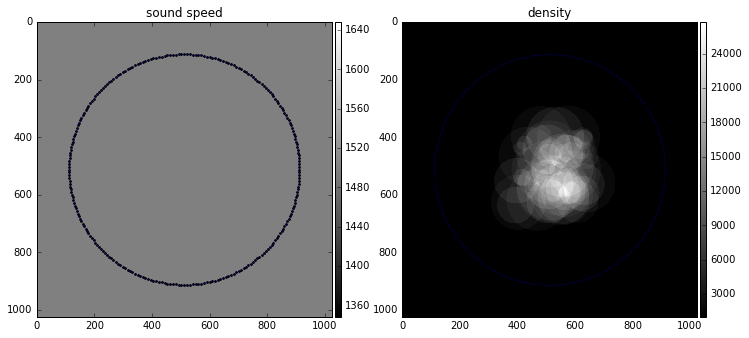

In [8]:
rf = RFdata(result_path)

rf.draw_input()

In [9]:
iy = 569
ix = 361
radius = 25

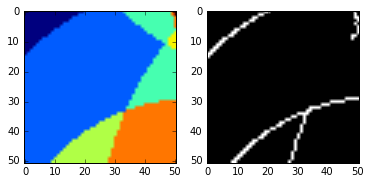

In [10]:
imp_partial = rf.medium_imp[iy-radius:iy+radius+1, ix-radius:ix+radius+1 ]
sct_partial = rf.medium_sct[iy-radius:iy+radius+1, ix-radius:ix+radius+1 ]

plt.subplot(1,2,1)
plt.imshow(imp_partial)
plt.subplot(1,2,2)
plt.imshow(sct_partial, cmap='gray' )

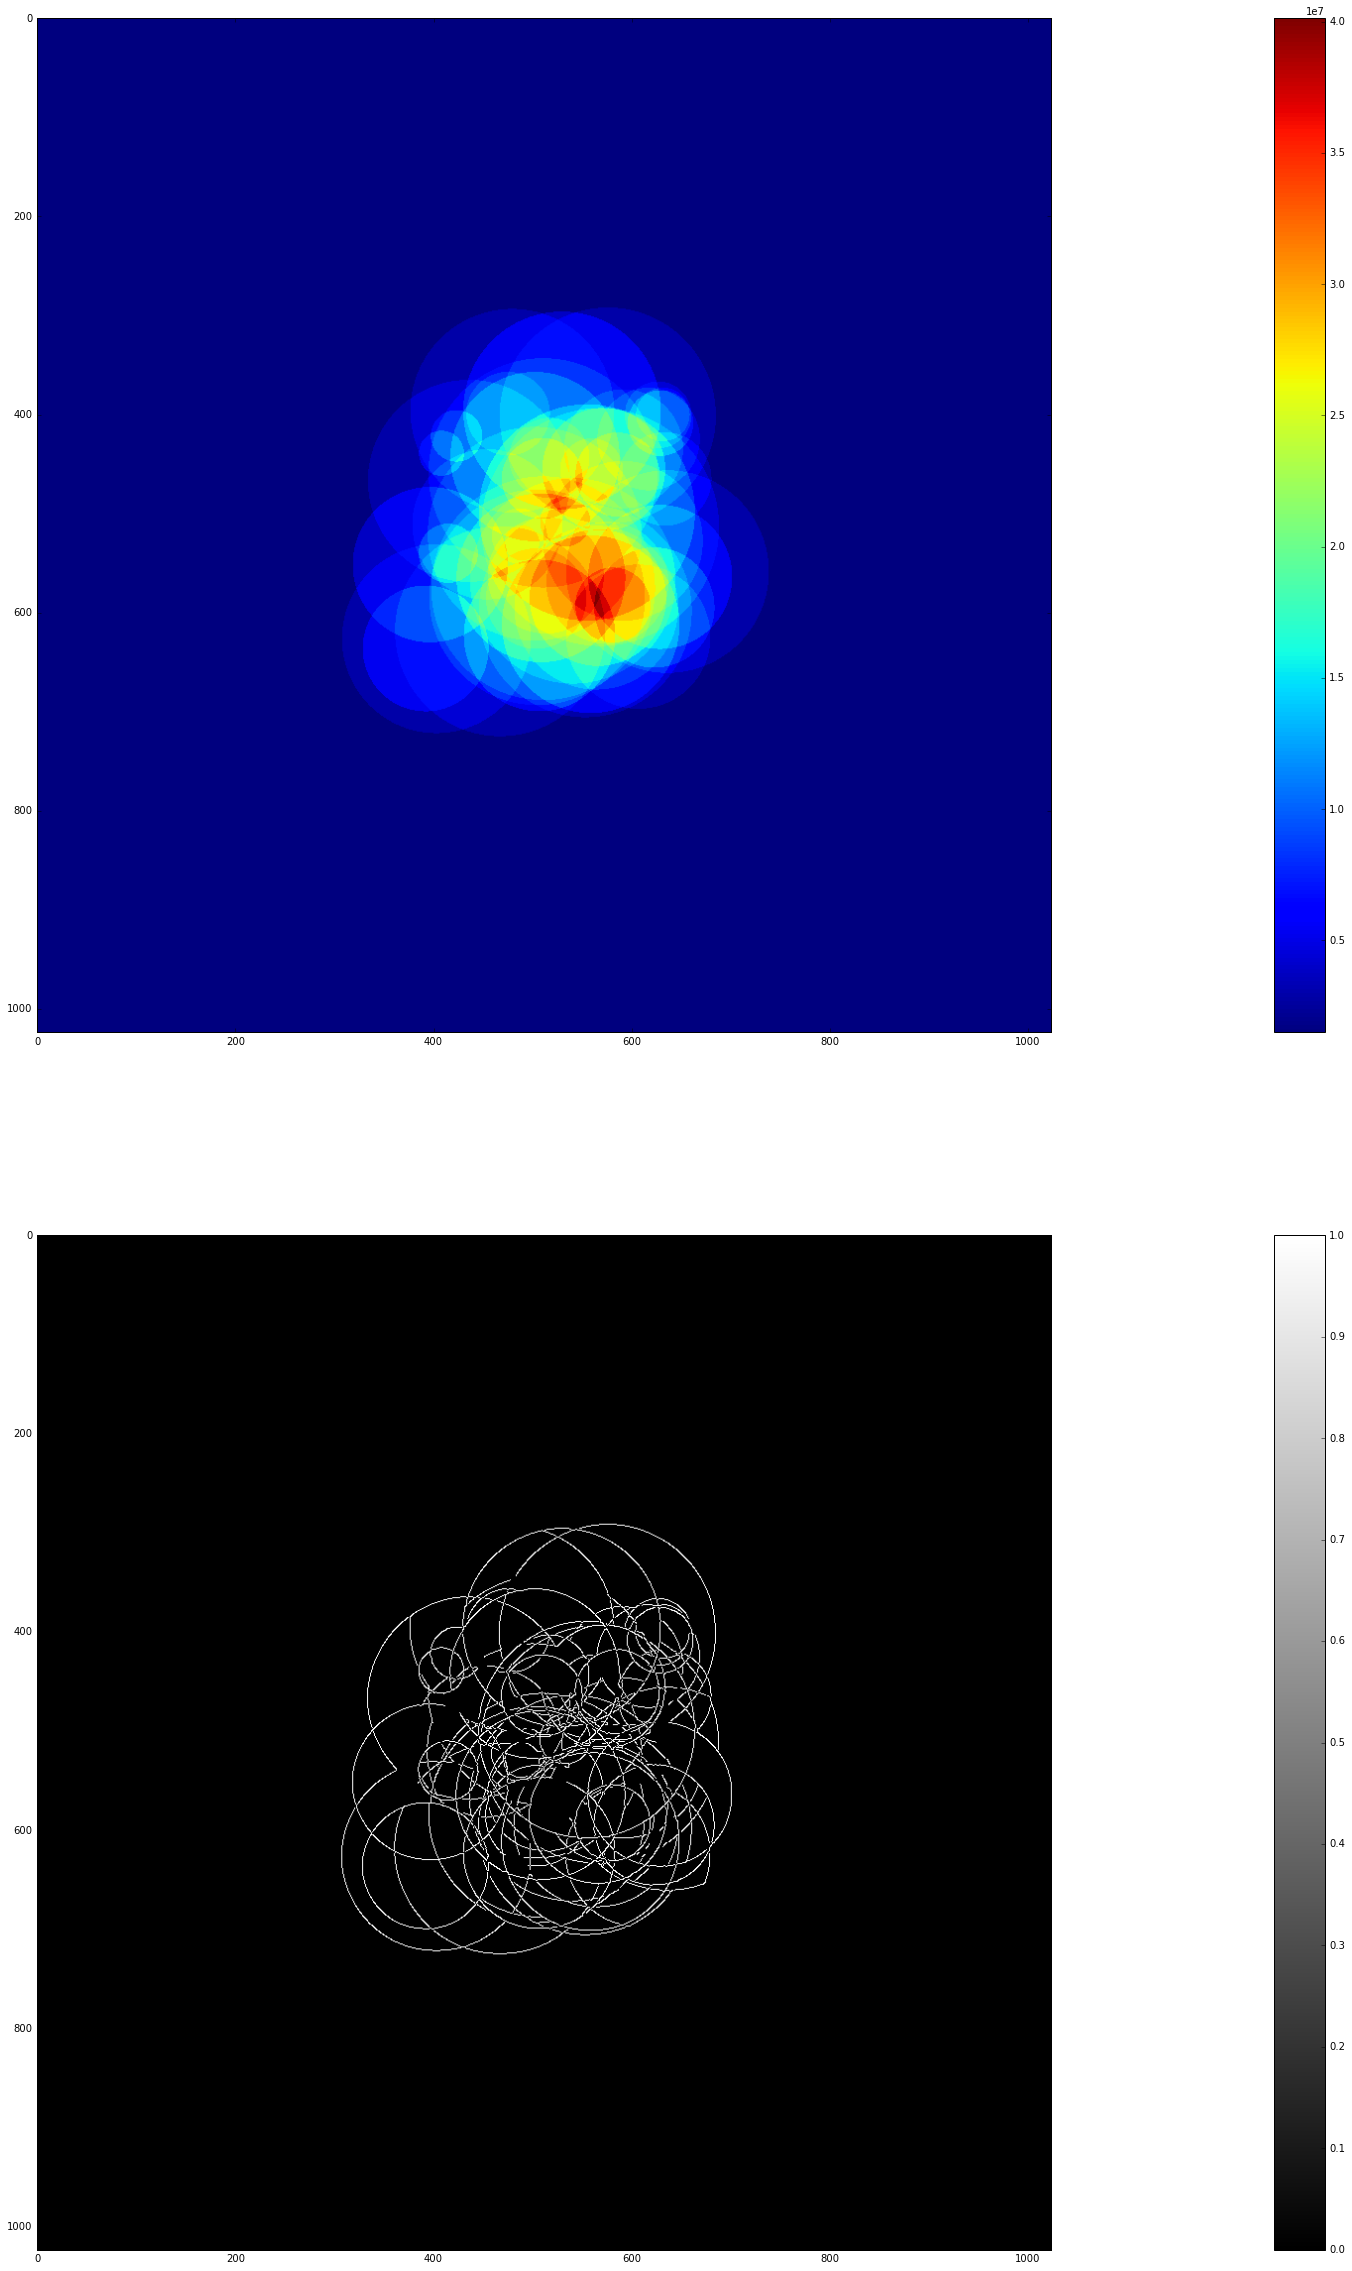

In [11]:
plt.figure(figsize=(80,40))
plt.subplot(2,1,1)
plt.imshow(rf.medium_imp)
plt.colorbar()
plt.subplot(2,1,2)
plt.imshow(rf.medium_sct, cmap='gray')
plt.colorbar()

## サブセット取得

In [5]:
ngrid = np.array([512,512])
pos = rf.ngrid2pos(ngrid)
pos

array([0., 0.])

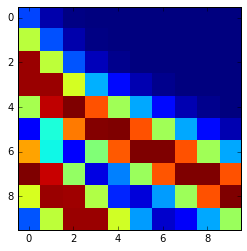

In [6]:
y, x= ngrid
plt.imshow(rf.medium_sct[y-5:y+5,x-5:x+5], interpolation='nearest')

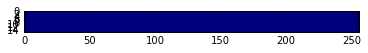

In [7]:
timemap, subset = rf.getPointSubset(ngrid, offset_arr=np.arange(-100,100,1))

plt.imshow(timemap)

### 展開図

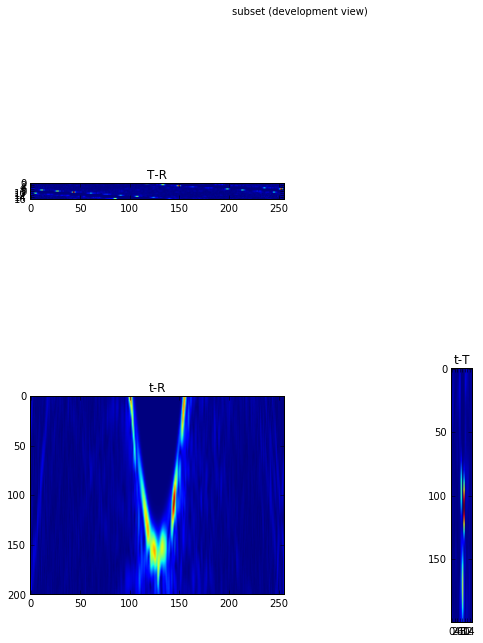

In [8]:
fig = plt.figure(figsize=(10,10))

fig.suptitle("subset (development view)")

plt.subplot(2,2,1)
plt.imshow(subset[:,:,0])
plt.title('T-R')

plt.subplot(2,2,3)
plt.imshow(subset[0,:,:].T)
plt.title('t-R')

plt.subplot(2,2,4)
plt.imshow(subset[:,0,:].T)
plt.title('t-T')

### 1次元平均圧縮

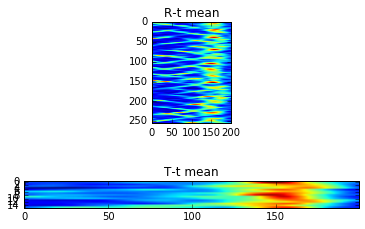

In [9]:
fig.suptitle("subset (1D mean reduction)")

plt.subplot(2,1,1)
plt.imshow(np.mean( subset, axis=0 ))
plt.title('R-t mean')

plt.subplot(2,1,2)
plt.imshow(np.mean(subset, axis=1))
plt.title('T-t mean')

### ２次元圧縮波形

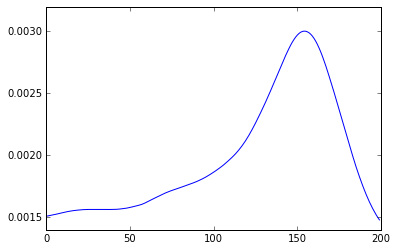

In [10]:
plt.plot(np.mean(np.mean(subset, axis=0), axis=0))

In [11]:
np.sum(subset[:,:,100])

7.639223151627283

## 透過波除去

送信素子から一定距離（リングアレイ半径）より遠い素子のRFデータをマスキング

In [12]:
def func_mask(rf):
    return (np.linalg.norm(rf.mesh_pos_rcv - rf.mesh_pos_src, axis=2) < rf.param["ringarray"]["radius"]*1.0 )*1

mask = rf.setTRmask(func_mask)

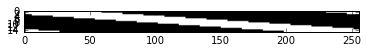

In [13]:
plt.imshow(mask, cmap='gray')

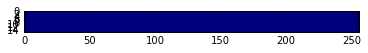

In [14]:
timemap, subset = rf.getPointSubset(ngrid, offset_arr=np.arange(-100,100,1))

plt.imshow(timemap)

### 展開図

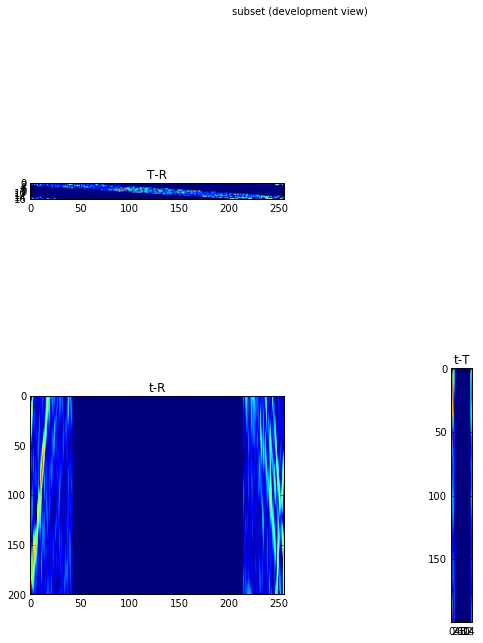

In [15]:
fig = plt.figure(figsize=(10,10))

fig.suptitle("subset (development view)")

plt.subplot(2,2,1)
plt.imshow(subset[:,:,0])
plt.title('T-R')

plt.subplot(2,2,3)
plt.imshow(subset[0,:,:].T)
plt.title('t-R')

plt.subplot(2,2,4)
plt.imshow(subset[:,0,:].T)
plt.title('t-T')

### 1次元平均圧縮

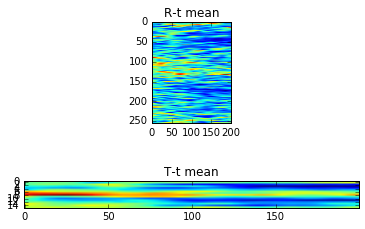

In [16]:
fig.suptitle("subset (1D mean reduction)")

plt.subplot(2,1,1)
plt.imshow(np.mean( subset, axis=0 ))
plt.title('R-t mean')

plt.subplot(2,1,2)
plt.imshow(np.mean(subset, axis=1))
plt.title('T-t mean')

### ２次元圧縮波形

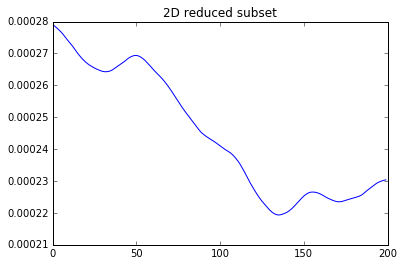

In [17]:
plt.plot(np.mean(np.mean(subset, axis=0), axis=0))
plt.title("2D reduced subset")

In [18]:
np.sum(subset[:,:,100])

0.9873198342140164

## Synthetic Aperture

グリッド圧縮率

In [19]:
c = 4

SA再構成

In [20]:
sa = rf.syntheticAperture(c=c)

シミュレーションに入力された音響インピーダンス画像と比較

In [34]:
np.save('./sa', sa)

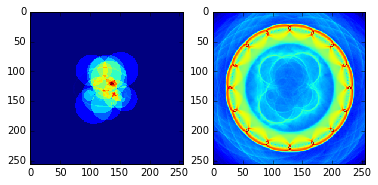

In [21]:
plt.subplot(1,2,1)
plt.imshow(rf.medium_imp[::c,::c], interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(sa, interpolation='nearest')

定量評価

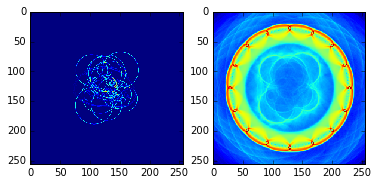

In [22]:
sct = rf.medium_sct[::c,::c]

plt.clf()
plt.subplot(1,2,1)
plt.imshow(sct,interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(sa, interpolation='nearest')

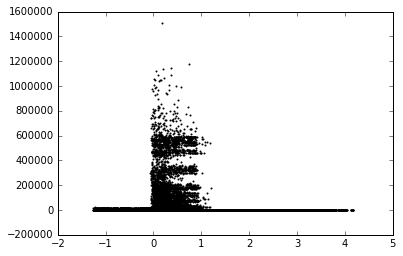

In [27]:
plt.clf()
plt.scatter(sa.flatten(), sct.flatten(),s=1)

## misc

In [24]:
ngrid = np.array([0,0])
rf.ngrid2pos(ngrid)

array([-0.064, -0.064])

In [25]:
pos = np.array([-0.05, 0])
rf.pos2ngrid(pos)

(512, 112)

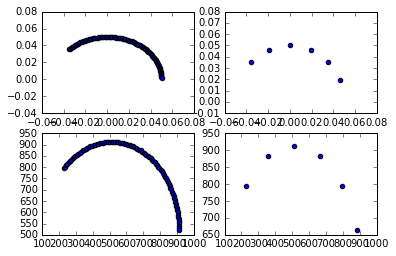

In [26]:
points_rcv =  np.array([rf.pos2ngrid(pos) for pos in rf.sensor_pos[96:192]])
points_src =  np.array([rf.pos2ngrid(pos) for pos in rf.source_pos[6:12]])

plt.subplot(2,2,1)
plt.scatter(rf.sensor_pos[96:192,0], rf.sensor_pos[96:192,1])
plt.subplot(2,2,2)
plt.scatter(rf.source_pos[6:12,0], rf.source_pos[6:12,1])
plt.subplot(2,2,3)
plt.scatter(points_rcv[:,1], points_rcv[:,0])
plt.subplot(2,2,4)
plt.scatter(points_src[:,1], points_src[:,0])